In [14]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
import matplotlib.pyplot as plt
from time import time
import sys
from abel.direct import direct_transform
from abel.tools.analytical import GaussianAnalytical
from xbeamfit import fitting
from xbeamfit import distributions 
import json
import numpy as np
import scipy as sp
import pandas as pd
import sys
import xbeamfit as xb 
from scipy import interpolate
from numpy import trapz
import scipy.integrate as integrate
from scipy import special
from scipy.stats import norm

from scipy.stats import chi
from scipy.stats import chi2
from xsuite_functions import footprint as fp

In [2]:
# find r from an abel transform of a q-gauss

x = np.linspace(-2,2,20000)

y = []

for i in range(5000):
    y.append(0)
for i in range(10000):
    y.append(np.pi)
for i in range(5000):
    y.append(0)



############ Inverse Abel transform 

r = np.linspace(0.00001,2.00001,10000)
abel_qgauss = direct_transform(y[10000:], dr=np.diff(r)[0], direction="inverse", correction=True)

abel_qgauss_r = abel_qgauss*r


Falling back to a pure Python backend...


(0.0, 4.0)

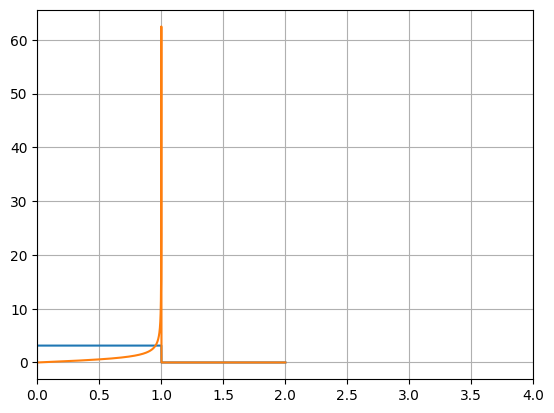

In [3]:
plt.plot(x, y)
plt.plot(r, abel_qgauss_r)
plt.grid()
plt.xlim([0,4])

In [7]:
xq= abel_qgauss_r/np.sum(abel_qgauss_r)
xq = np.nan_to_num(xq)

r_hist = np.random.choice(a=r,p=xq,size=100000)
theta_hist  = np.random.uniform(0,2*np.pi,size=100000)


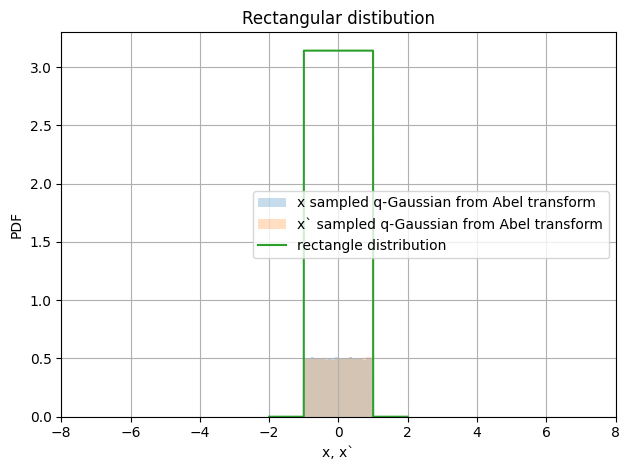

In [8]:
plt.hist(r_hist*np.cos(theta_hist), bins=400, range=[-20,20
                                                    ],density=True, alpha=0.25,  label='x sampled q-Gaussian from Abel transform');
plt.hist(r_hist*np.sin(theta_hist), bins=400, range=[-20,20],density=True, alpha=0.25, label='x` sampled q-Gaussian from Abel transform');
plt.xlim([-8,8],)
plt.plot(x,y, label='rectangle distribution')

plt.xlabel('x, x`')

plt.ylabel('PDF')

plt.title('Rectangular distibution')
plt.legend()
plt.grid()
plt.tight_layout()

#plt.savefig('./presentation_plots/abel_compare_sampled_qgaussian_projection.png', dpi=400)


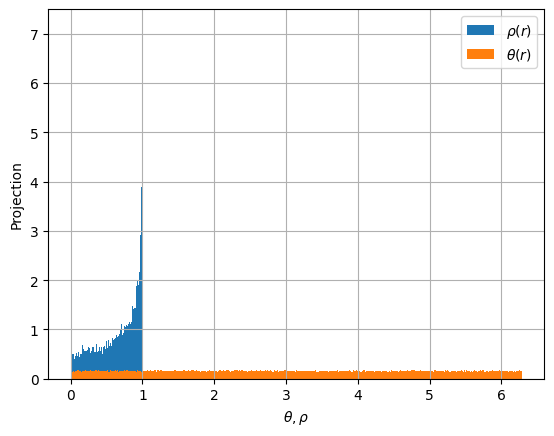

In [13]:
plt.hist(r_hist*r_hist, bins=400, density=True, label='$\\rho(r)$');
plt.hist(theta_hist, bins=400, density=True, label='$\\theta(r)$');

#rp = np.linspace(0,1,1000)
#unc_r = 1/np.sqrt(1-rp**2)
#plt.plot(rp,func_r, label='$1/\\sqrt{1-r^2}$')
plt.grid()
plt.legend()
plt.xlabel('$\\theta, \\rho$')
plt.ylabel('Projection')
plt.ylim([0,7.5])
plt.savefig('presentation_plots/theta_rho_update_rect.png', dpi=400)

